# Sentiment Analysis Womens clothing E-commerce with Vader and roBERTa Hugging Face Transformers.(Phân tích cảm xúc người dùng mua quần áo phụ nữ online sử dụng Vader và roBERTa Hugging Face Transformers)

# Đọc Data and NLTK Basics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [2]:
import pandas as pd

# Read the dataset
df = pd.read_csv('/content/Womens Clothing E-Commerce Reviews.csv')
print(df.shape)

# Select the first 500 rows
df = df.head(500)
print(df.shape)


(23485, 11)
(500, 11)


#Quick EDA

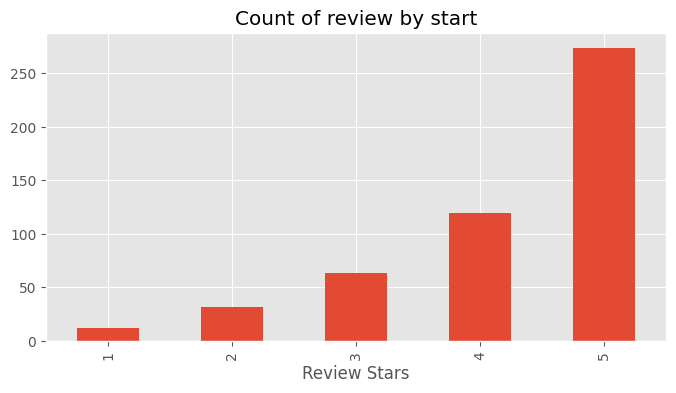

In [3]:
ax = df['Rating'].value_counts().sort_index().plot(
    kind='bar',
    title='Count of review by start',
    figsize=(8,4))
ax.set_xlabel('Review Stars')
plt.show()

#Basic NLTK (Nature langue cơ bản)

In [4]:
example = df['Review Text'][50]
print(example)

I absolutely love this bib tee! it's probably my favorite retailer purchase of all time. i'm 5'7", 140 pounds and the small was a perfect fit for me. i typically wear either a s or m tops.


In [5]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['I', 'absolutely', 'love', 'this', 'bib', 'tee', '!', 'it', "'s", 'probably']

In [6]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('I', 'PRP'),
 ('absolutely', 'RB'),
 ('love', 'VBP'),
 ('this', 'DT'),
 ('bib', 'JJ'),
 ('tee', 'NN'),
 ('!', '.'),
 ('it', 'PRP'),
 ("'s", 'VBZ'),
 ('probably', 'RB')]

In [7]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  absolutely/RB
  love/VBP
  this/DT
  bib/JJ
  tee/NN
  !/.
  it/PRP
  's/VBZ
  probably/RB
  my/PRP$
  favorite/JJ
  retailer/NN
  purchase/NN
  of/IN
  all/DT
  time/NN
  ./.
  i/VB
  'm/VBP
  5/CD
  '/POS
  7/CD
  ''/''
  ,/,
  140/CD
  pounds/NNS
  and/CC
  the/DT
  small/JJ
  was/VBD
  a/DT
  perfect/JJ
  fit/NN
  for/IN
  me/PRP
  ./.
  i/VB
  typically/RB
  wear/VBP
  either/RB
  a/DT
  s/NN
  or/CC
  m/NN
  tops/NNS
  ./.)


#VADER Chấm điểm Cảm xúc
Sử dụng phương pháp "word bag":

* Các từ dừng (stop words) được loại bỏ

* Mỗi từ được chấm điểm và kết hợp lại thành tổng điểm.

In [8]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [9]:
sia.polarity_scores('This is the so beautiful.')

{'neg': 0.0, 'neu': 0.445, 'pos': 0.555, 'compound': 0.7177}

In [10]:
sia.polarity_scores('This is the ugly.')

{'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'compound': -0.5106}

In [11]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.601, 'pos': 0.399, 'compound': 0.9537}

In [12]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Review Text']
    myid = row['Id']
    # Handle missing values
    if pd.notna(text):
        res[myid] = sia.polarity_scores(text)
    else:
        res[myid] = {'neg': None, 'neu': None, 'pos': None, 'compound': None} # Or any other default value

  0%|          | 0/500 [00:00<?, ?it/s]

In [13]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [14]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,1,0.0,0.664,0.336,0.9729,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
1,2,0.027,0.792,0.181,0.9427,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
2,3,0.226,0.34,0.434,0.5727,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
3,4,0.0,0.7,0.3,0.9291,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
4,5,0.0,0.853,0.147,0.9419,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses


#Kết quả VADER

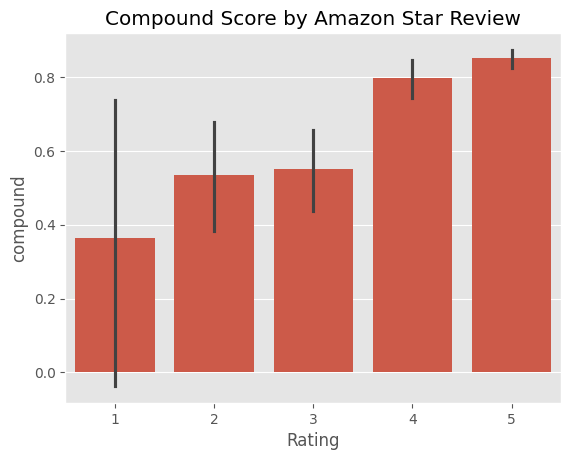

In [15]:
ax = sns.barplot(data=vaders, x='Rating', y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

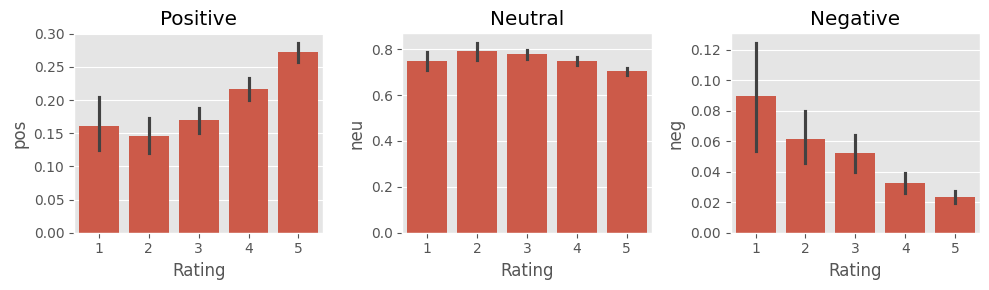

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
sns.barplot(data=vaders, x='Rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

#Huấn luyện mô hình Roberta
* Sử dụng mô hình được huấn luyện từ một khối dữ liệu lớn.
* Mô hình máy biến áp không chỉ tính đến các từ mà còn cả ngữ cảnh liên quan đến các từ khác.

In [17]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [18]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [19]:
# VADER results on example
print(example)
sia.polarity_scores(example)

I absolutely love this bib tee! it's probably my favorite retailer purchase of all time. i'm 5'7", 140 pounds and the small was a perfect fit for me. i typically wear either a s or m tops.


{'neg': 0.0, 'neu': 0.601, 'pos': 0.399, 'compound': 0.9537}

In [20]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.0011589901, 'roberta_neu': 0.0071727047, 'roberta_pos': 0.9916682}


In [21]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [22]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Review Text']
        myid = row['Id']
        # Handle potential missing or non-string 'Review Text' values
        if isinstance(text, str):
            vader_result = sia.polarity_scores(text)
            vader_result_rename = {}
            for key, value in vader_result.items():
                vader_result_rename[f"vader_{key}"] = value
            roberta_result = polarity_scores_roberta(text)
            both = {**vader_result_rename, **roberta_result}
            res[myid] = both
        else:
            print(f'Skipping id {myid} due to invalid "Review Text" value: {text}')
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Skipping id 92 due to invalid "Review Text" value: nan
Skipping id 93 due to invalid "Review Text" value: nan
Skipping id 98 due to invalid "Review Text" value: nan
Skipping id 135 due to invalid "Review Text" value: nan
Skipping id 142 due to invalid "Review Text" value: nan
Skipping id 165 due to invalid "Review Text" value: nan
Skipping id 168 due to invalid "Review Text" value: nan
Skipping id 192 due to invalid "Review Text" value: nan
Skipping id 201 due to invalid "Review Text" value: nan
Skipping id 248 due to invalid "Review Text" value: nan
Skipping id 265 due to invalid "Review Text" value: nan
Skipping id 298 due to invalid "Review Text" value: nan
Skipping id 323 due to invalid "Review Text" value: nan
Skipping id 342 due to invalid "Review Text" value: nan
Skipping id 345 due to invalid "Review Text" value: nan
Skipping id 400 due to invalid "Review Text" value: nan
Skipping id 425 due to invalid "Review Text" value: nan
Skipping id 455 due to invalid "Review Text" value:

In [23]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

#So sánh hiệu số giữa 2 mô hình

In [24]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'Clothing ID', 'Age',
       'Title', 'Review Text', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name'],
      dtype='object')

#So  sánh kết quả

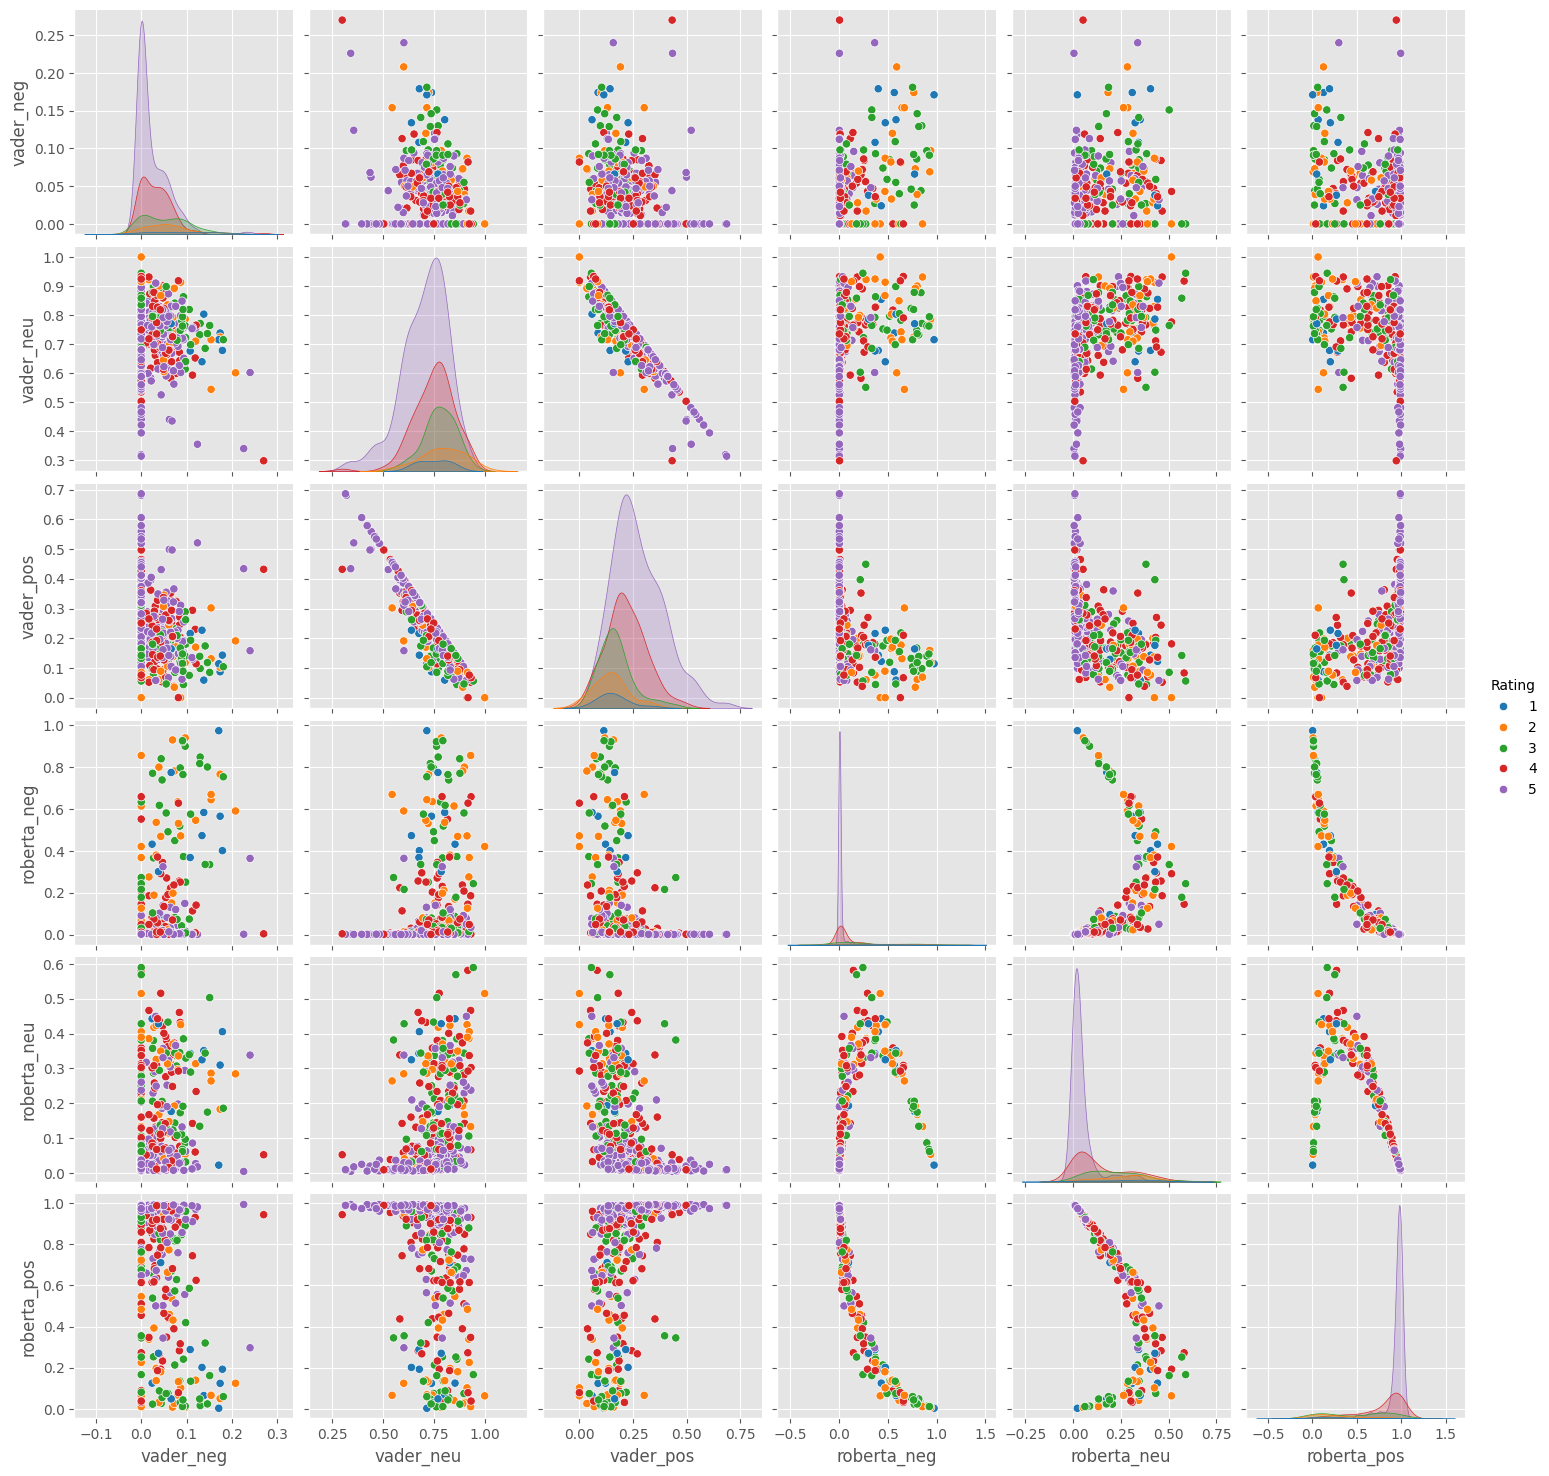

In [25]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Rating',
            palette='tab10')
plt.show()

#Review Ví dụ:
* Đánh giá tích cực 1 sao và đánh giá 5 sao tiêu cực
* Hãy xem xét một số ví dụ trong đó điểm mô hình và điểm đánh giá khác nhau nhất.

In [26]:
results_df.query('Rating == 1') \
    .sort_values('roberta_pos', ascending=False)['Review Text'].values[0]

"I was very excited to order this top in red xs. so cute, but it was huge, shapeless and support thin! it had to go back. i should've looked at other reviews."

In [27]:
results_df.query('Rating == 1') \
    .sort_values('vader_neg', ascending=False)['Review Text'].values[0]

'I usually wear a medium and bought a small. it fit ok, but had no shape and was not flattering. i love baby doll dresses and tops, but this was a tent. my daughter saw me try it on and said "that\'s a piece of tablecloth." it\'s going back.'

In [28]:
results_df.query('Rating == 5') \
    .sort_values('roberta_pos', ascending=False)['Review Text'].values[0]

"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"

In [29]:
results_df.query('Rating == 5') \
    .sort_values('vader_neg', ascending=False)['Review Text'].values[0]

'Loved the green color, the cut is super flattering, but alas, i do need hte petite, ti was a bit long and i looked a little lost. unfrotuantely, the color is sold out in petite :-('

#The Transformers Pipeline
* mô hình dự đoán cảm xúc

In [30]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [31]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [32]:
sent_pipeline('I hate this.')


[{'label': 'NEGATIVE', 'score': 0.9996209144592285}]

In [33]:
sent_pipeline('booo')

[{'label': 'NEGATIVE', 'score': 0.9936267137527466}]